CSP con pywrapcp

Se encontraron 64 soluciones.


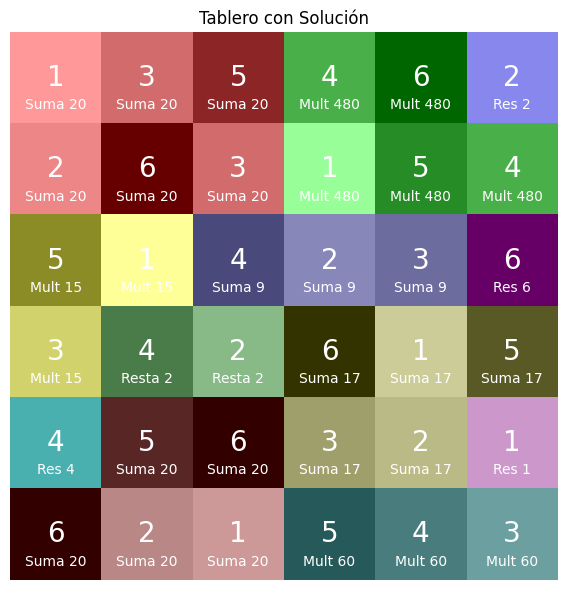

In [6]:
from ortools.constraint_solver import pywrapcp
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import numpy as np

colores_hex = ["#FF0000", "#00FF00", "#0000FF", "#FFFF00", "#00FFFF", "#FF00FF",
               "#800000", "#008000", "#000080", "#808000", "#800080", "#008080", "#C0C0C0", "#808080"]
color_generator = (color for color in colores_hex)

def generar_color_unico():
    try:
        return next(color_generator)
    except StopIteration:
        return "#000000"

colores_restricciones = {
    tuple(["cell11","cell12","cell13","cell21","cell22","cell23"]): generar_color_unico(),
    tuple(["cell14","cell15","cell24","cell25","cell26"]): generar_color_unico(),
    tuple(["cell16"]): generar_color_unico(),
    tuple(["cell31","cell32","cell41"]): generar_color_unico(),
    tuple(["cell51"]): generar_color_unico(),
    tuple(["cell36"]): generar_color_unico(),
    tuple(["cell61","cell62","cell63","cell52","cell53"]): generar_color_unico(),
    tuple(["cell42","cell43"]): generar_color_unico(),
    tuple(["cell33","cell34","cell35"]): generar_color_unico(),
    tuple(["cell44","cell45","cell46","cell54","cell55"]): generar_color_unico(),
    tuple(["cell56"]): generar_color_unico(),
    tuple(["cell64","cell65","cell66"]): generar_color_unico(),
}

    
def graficar_tablero1(valores, anotaciones, titulo="Tablero"):
    tablero = np.zeros((6, 6))
    color_map = np.zeros((6, 6, 3)) 
    

    for i in range(1, 7):
        for j in range(1, 7):
            cell = f"cell{i}{j}"
            if cell in valores:
                tablero[i - 1, j - 1] = valores[cell]
                for cells, color in colores_restricciones.items():
                    if cell in cells:
                        color_map[i-1, j-1] = mcolors.hex2color(color) 
                        break

    plt.figure(figsize=(6, 6))
    plt.title(titulo)
    plt.imshow(color_map, cmap= 'flag', aspect='equal', interpolation='nearest')  


    if np.any(tablero != 0):
        plt.imshow(tablero, cmap="Greys", alpha=0.6, aspect='equal', interpolation='nearest')  
        
    for i in range(6):
        for j in range(6):
            cell = f"cell{i + 1}{j + 1}"
            valor = str(int(tablero[i, j])) if tablero[i, j] != 0 else ' '
            anotacion = anotaciones.get(cell, '') 

            plt.text(j, i, valor, ha='center', va='center', fontsize=20, color='white')
            if anotacion:
                plt.text(j, i + 0.3, anotacion, ha='center', va='center', fontsize=10, color='white') 

    plt.xticks([])
    plt.yticks([])
    plt.axis('off')  
    plt.tight_layout()
    plt.show()

anotaciones={
    "cell11": "Suma 20",
    "cell12": "Suma 20",
    "cell13": "Suma 20",
    "cell21": "Suma 20",
    "cell22": "Suma 20",
    "cell23": "Suma 20",
    "cell31": "Mult 15",
    "cell32": "Mult 15",
    "cell41": "Mult 15",
    "cell14": "Mult 480",
    "cell24": "Mult 480",
    "cell15":  "Mult 480",
    "cell25": "Mult 480",
    "cell26":  "Mult 480",
    "cell16": "Res 2",
    "cell33": "Suma 9",
    "cell34": "Suma 9",
    "cell35": "Suma 9",
    "cell42": "Resta 2",
    "cell43": "Resta 2",
    "cell36": "Res 6",
    "cell44": "Suma 17",
    "cell45": "Suma 17",
    "cell46": "Suma 17",
    "cell54": "Suma 17",
    "cell55": "Suma 17",
    "cell56": "Res 1",
    "cell61": "Suma 20",
    "cell62": "Suma 20",
    "cell63": "Suma 20",
    "cell52": "Suma 20",
    "cell53": "Suma 20",
    "cell64": "Mult 60",
    "cell65": "Mult 60",
    "cell66": "Mult 60",
    "cell51": "Res 4"
}


solver = pywrapcp.Solver("KenKen")

domain = [1, 2, 3, 4, 5, 6]

cells = [[solver.IntVar(domain, f"cell{i}{j}") for j in range(1, 7)] for i in range(1, 7)]


for i in range(6):
    solver.Add(solver.AllDifferent(cells[i]))
    solver.Add(solver.AllDifferent([cells[j][i] for j in range(6)]))


solver.Add(cells[0][0] + cells[0][1] + cells[0][2] + cells[1][0] + cells[1][1] + cells[1][2] == 20)
solver.Add(cells[0][3] * cells[0][4] * cells[1][3] * cells[1][4] * cells[1][5] == 480)
solver.Add(cells[0][5] == 2)
solver.Add(cells[2][0] * cells[2][1] * cells[3][0] == 15)
solver.Add(cells[4][0] == 4)
solver.Add(cells[5][0] + cells[5][1] + cells[5][2] + cells[4][1] + cells[4][2] == 20)
solver.Add(cells[3][1] - cells[3][2] == 2)
solver.Add(cells[2][2] + cells[2][3] + cells[2][4] == 9)
solver.Add(cells[0][3] * cells[0][4] * cells[1][3] * cells[1][4] * cells[1][5] == 480)
solver.Add(cells[0][5] == 2)
solver.Add(cells[2][5] == 6)
solver.Add(cells[3][3] + cells[3][4] + cells[3][5] + cells[4][3] + cells[4][4] == 17)
solver.Add(cells[4][5] == 1)
solver.Add(cells[5][3] * cells[5][4] * cells[5][5] == 60)

collector = solver.AllSolutionCollector()

for row in cells:
    for cell in row:
        collector.Add(cell)


solver.Solve(solver.Phase([cell for row in cells for cell in row], 
                          solver.INT_VAR_SIMPLE, 
                          solver.INT_VALUE_SIMPLE), 
             [collector])


num_solutions = collector.SolutionCount()
print(f"Se encontraron {num_solutions} soluciones.")
if num_solutions > 0:
    solucion = {f"cell{i+1}{j+1}": collector.Value(0, cells[i][j]) for i in range(6) for j in range(6)}
    graficar_tablero1(solucion, anotaciones, "Tablero con Solución")

CSP con cp_model

In [86]:
%%file kenken1
0 0 3
0 0 0
0 0 0

Overwriting kenken1


Solución encontrada:


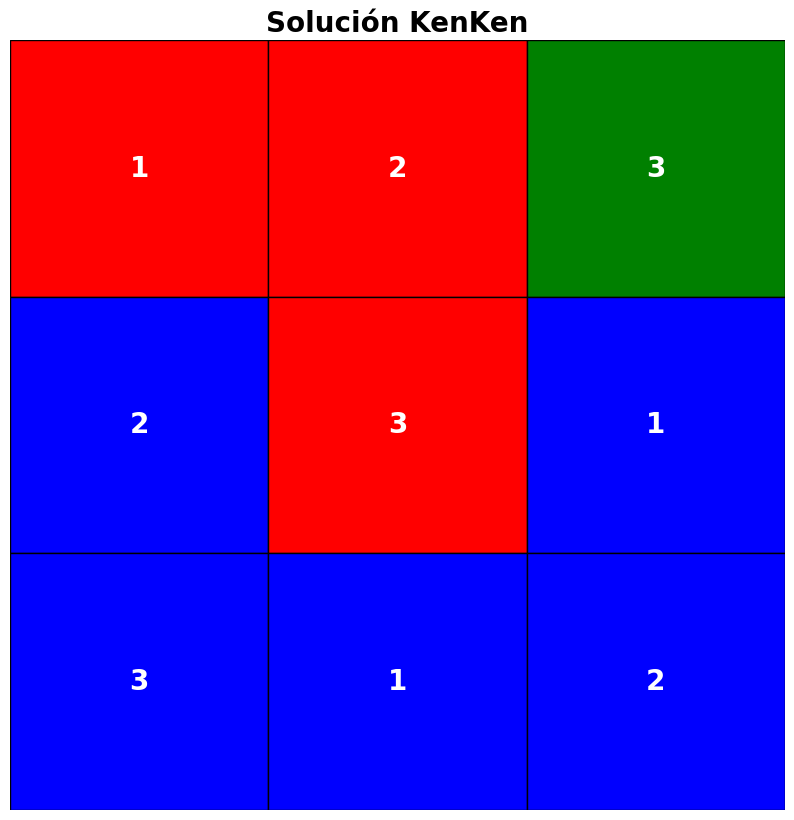

In [128]:
import matplotlib.pyplot as plt
from ortools.sat.python import cp_model

restricciones_colores = {
    'prod1': 'red',
    'suma': 'blue',
    'celda_0_2': 'green'
}

def dibujar_tablero(matriz, restricciones_colores):
    fig, ax = plt.subplots(figsize=(10, 10)) 

    for i in range(3):
        for j in range(3):
            celda = (i, j)
            color = 'white'
            for restriccion, restr_color in restricciones_colores.items():
                if restriccion in color_celdas and celda in color_celdas[restriccion]:
                    color = restr_color
                    break

            rect = plt.Rectangle((j, i), 1, 1, facecolor=color, edgecolor='black')
            ax.add_patch(rect)
            ax.text(j + 0.5, i + 0.5, str(matriz[i][j]), ha='center', va='center', fontsize=20, weight='bold', color='white')  #

    plt.xlim(0, 3)
    plt.ylim(0, 3)
    plt.gca().invert_yaxis()
    plt.axis('off')
    plt.title('Solución KenKen', fontsize=20, weight='bold')  
    plt.show()

with open('kenken1', 'r') as f:
    lines = f.readlines()

base_matrix = np.array([[int(num) for num in line.split()] for line in lines])


model = cp_model.CpModel()


cells = [[model.NewIntVar(1, 3, f"cell{i}{j}") for j in range(3)] for i in range(3)]


for i in range(3):
    model.AddAllDifferent(cells[i])
    model.AddAllDifferent([row[i] for row in cells])


prod1 = model.NewIntVar(1, 6, 'prod1')
model.AddMultiplicationEquality(prod1, [cells[0][0], cells[0][1], cells[1][1]])
model.Add(prod1 == 6)
model.Add(cells[0][2] == 3)
model.Add(cells[1][0] + cells[2][0] + cells[2][1] + cells[2][2] + cells[1][2] == 9)

solver = cp_model.CpSolver()
status = solver.Solve(model)

if status == cp_model.OPTIMAL or status == cp_model.FEASIBLE:
    solution = np.array([[solver.Value(cells[i][j]) for j in range(3)] for i in range(3)])
    print("Solución encontrada:")
   
    color_celdas = {
        'prod1': [(0, 0), (0, 1), (1, 1)],  
        'suma': [(1, 0), (2, 0), (2, 1), (2, 2), (1, 2)],  
        'celda_0_2': [(0, 2)],
    }
    dibujar_tablero(solution, restricciones_colores)

else:
    print("No se encontró solución.")
    
